In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
def run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded):
    models = {
        "LogisticRegression": LogisticRegression(),
        "SVC": SVC(),
        "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
        "RandomForestClassifier": RandomForestClassifier(random_state=42),
        "KNeighborsClassifier": KNeighborsClassifier(),
        "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
        "GaussianNB": GaussianNB(),
    }

    # Create an empty DataFrame to store accuracy
    model_performance = []

    for name, model in models.items():
        model.fit(X_train_scaled, y_train_encoded)
        predictions = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test_encoded, predictions)
        print(f"{name} Accuracy:", accuracy)
        model_performance.append({"Model": name, "Accuracy": accuracy})

    # For the Sequential model
    sequential_model = Sequential()
    sequential_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
    sequential_model.add(Dense(32, activation='relu'))
    sequential_model.add(Dense(1, activation='sigmoid'))
    sequential_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    sequential_model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=10, verbose=1)
    loss, accuracy = sequential_model.evaluate(X_test_scaled, y_test_encoded)
    print(f"Sequential Model Accuracy: {accuracy}")
    print(f"Sequential Model Loss: {loss}")
    model_performance.append({"Model": "Sequential", "Accuracy": accuracy})

    return pd.DataFrame(model_performance)


def hot_encode_binary_features(df:pd.DataFrame, columns:list)->pd.DataFrame:
    """_summary_

    Args:
        df (pd.DataFrame): _description_
        colums (list): _description_

    Returns:
        pd.DataFrame: _description_
    """
    
    for col in columns:
        df[col] = df[col].apply(lambda x: 1 if x == "YES" else 0)
    
    return df

In [3]:
df = pd.read_csv("diabetes_prediction_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [4]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [8]:
df.drop_duplicates(inplace=True)

/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py

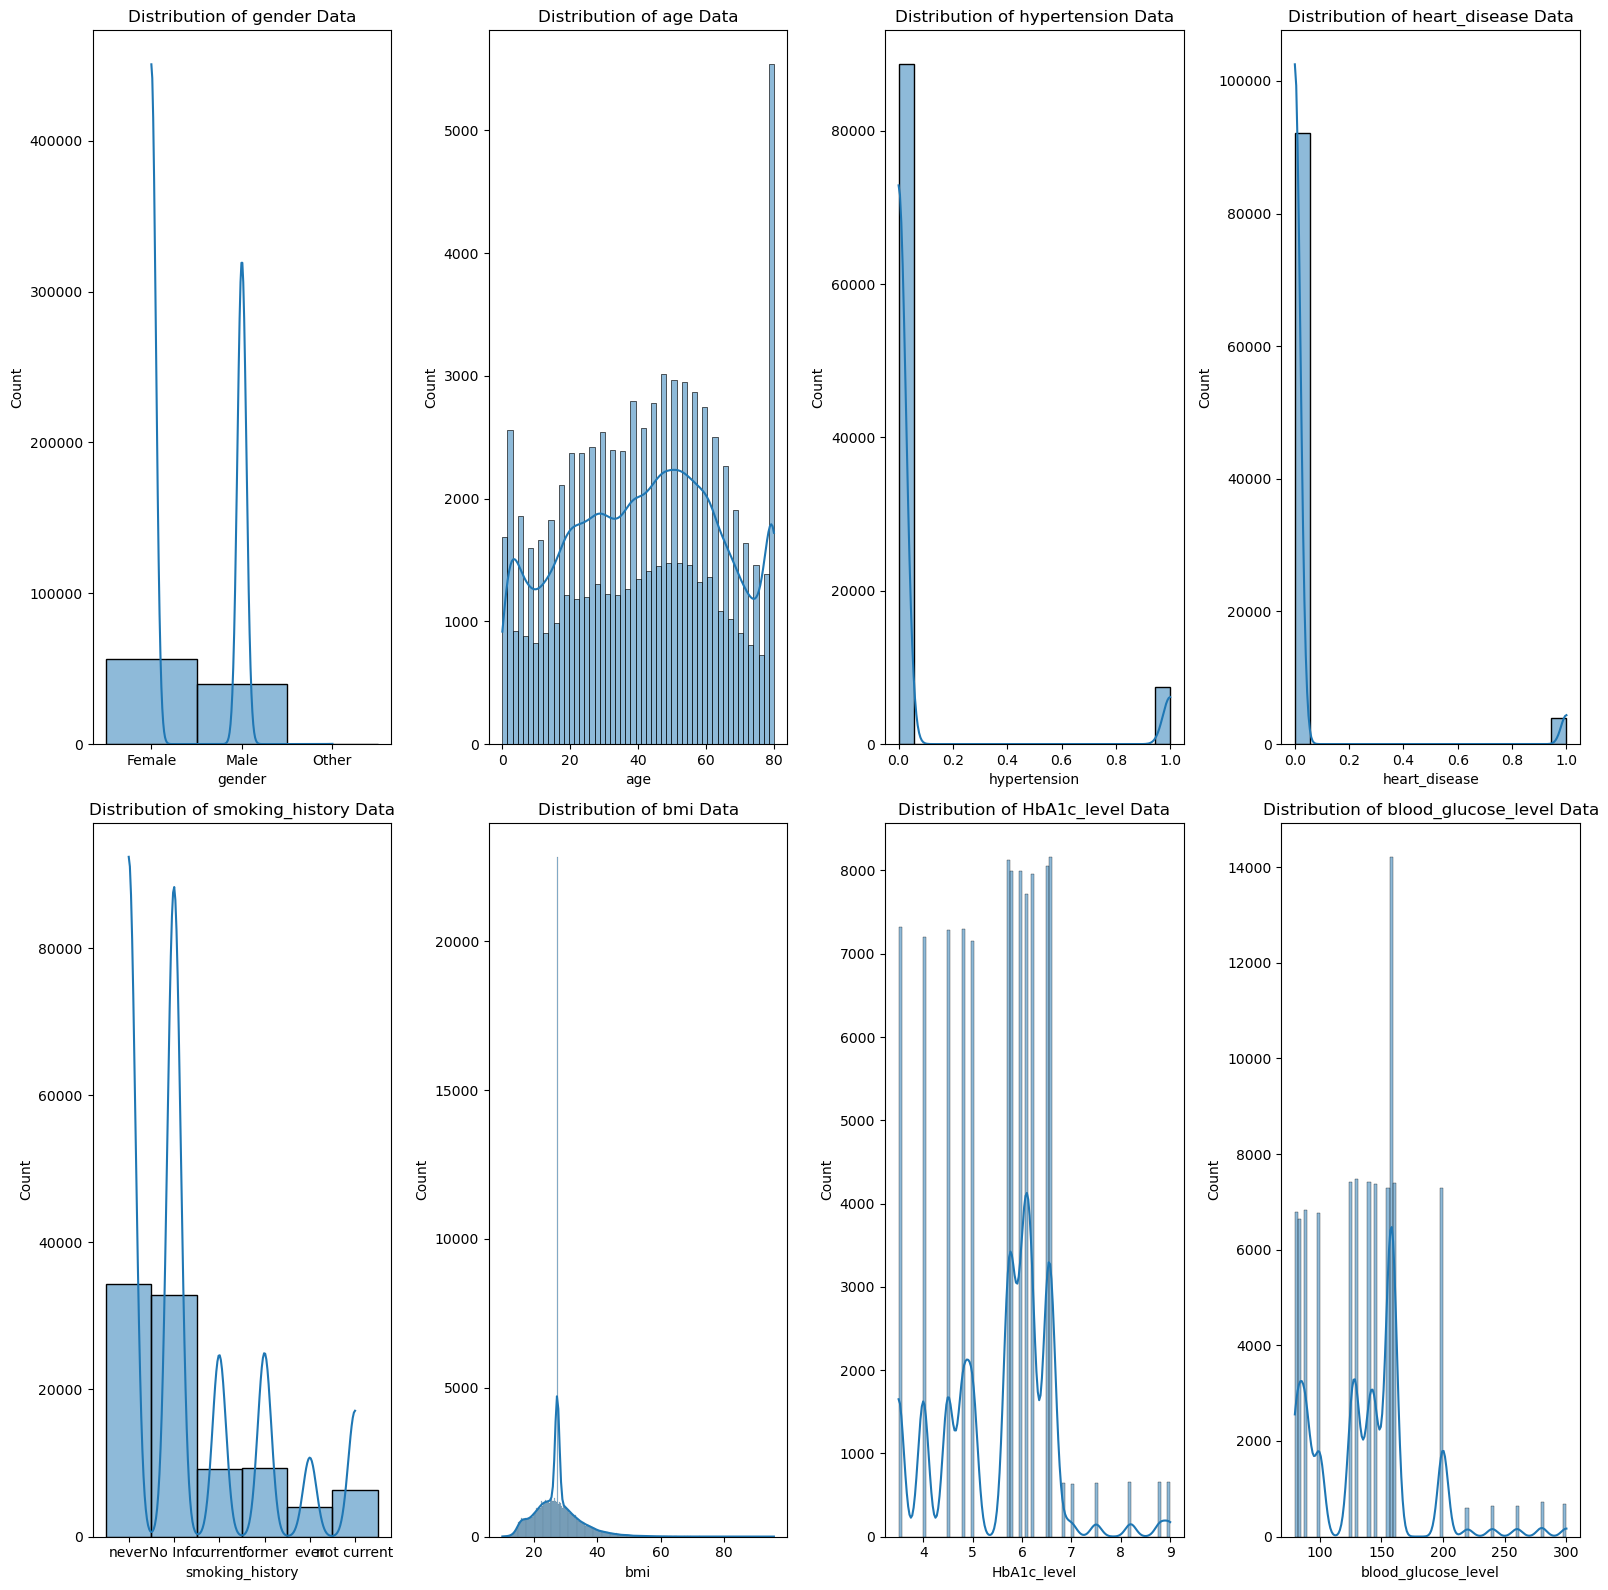

In [11]:
plt.figure(figsize = (16, 16))
num_plots = len(df.columns) - 1  # Exclude the last column
rows = (num_plots + 3) // 4  # Calculate the number of rows needed, add 3 to round up

for i, col in enumerate(df.columns[:-1]):
    plt.subplot(rows, 4, i+1)
    sns.histplot(df[col], kde= True)
    plt.title(f"Distribution of {col} Data")
    plt.tight_layout()
    plt.plot()

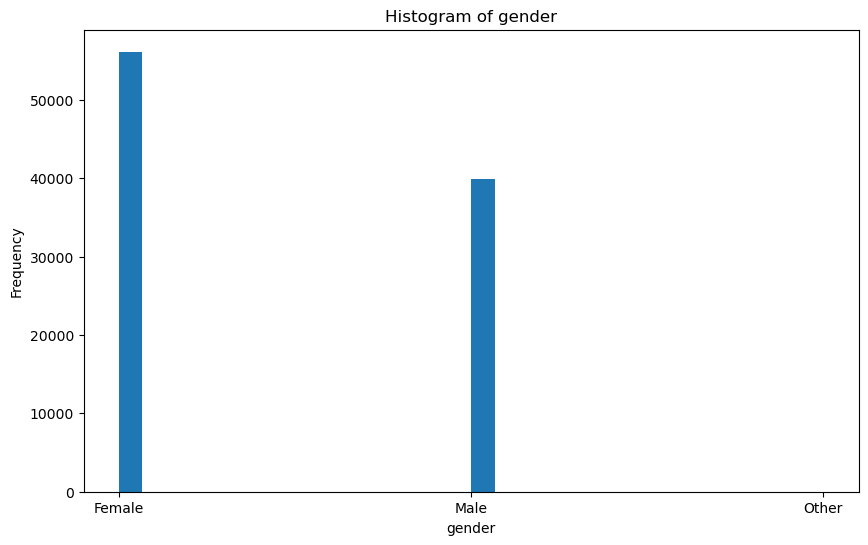

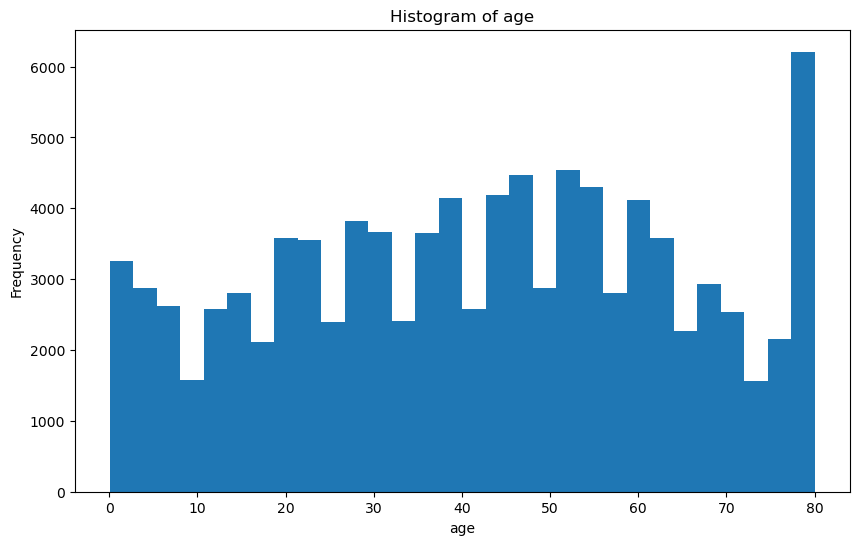

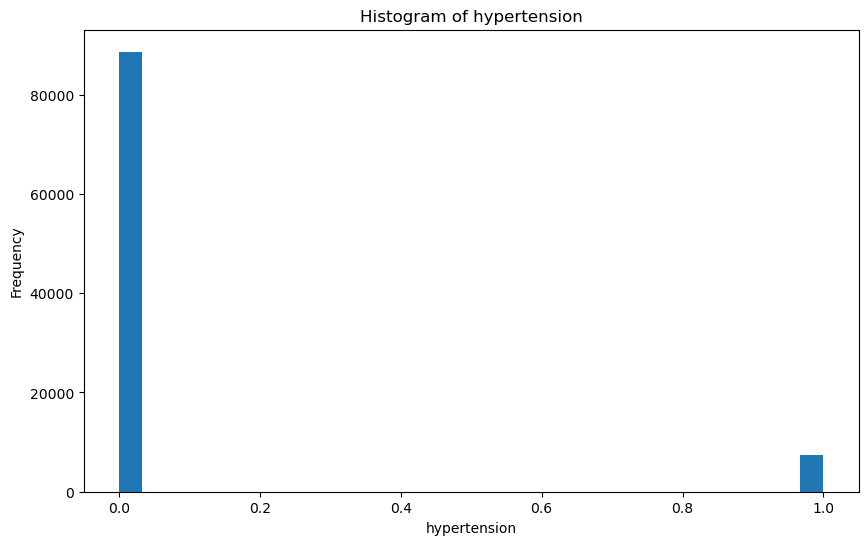

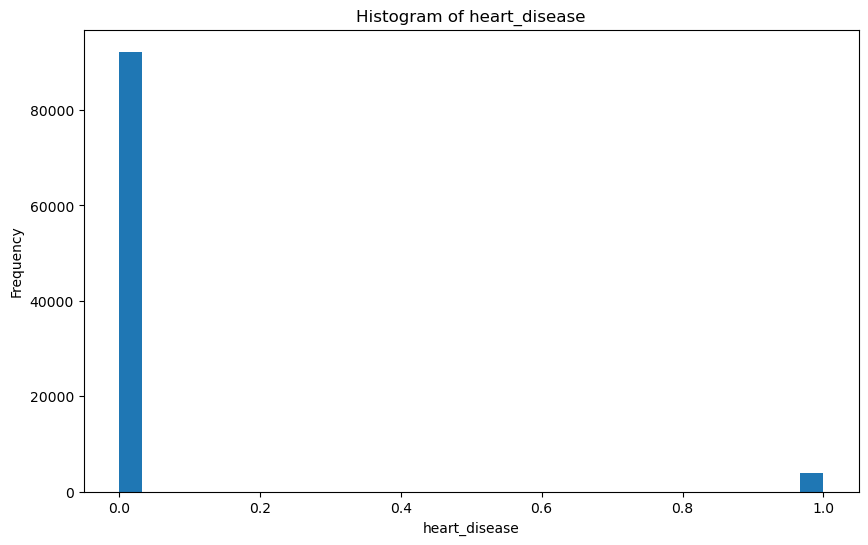

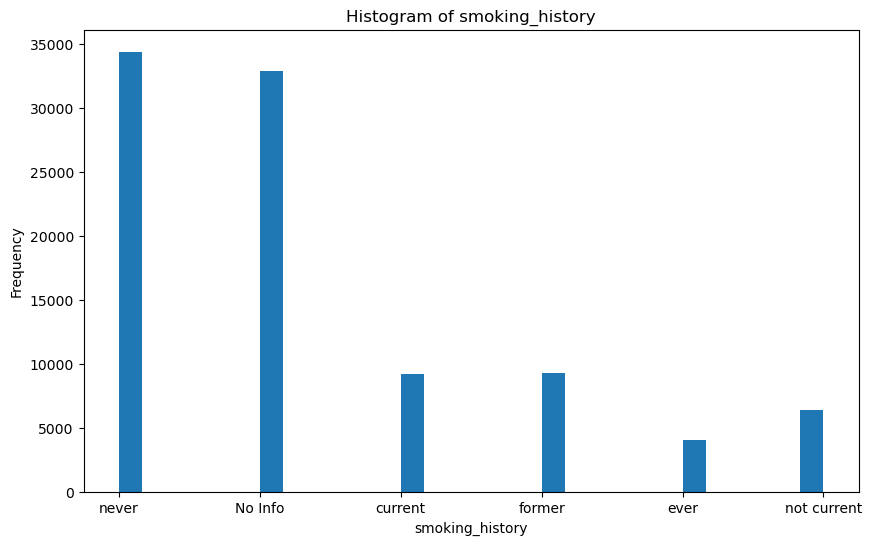

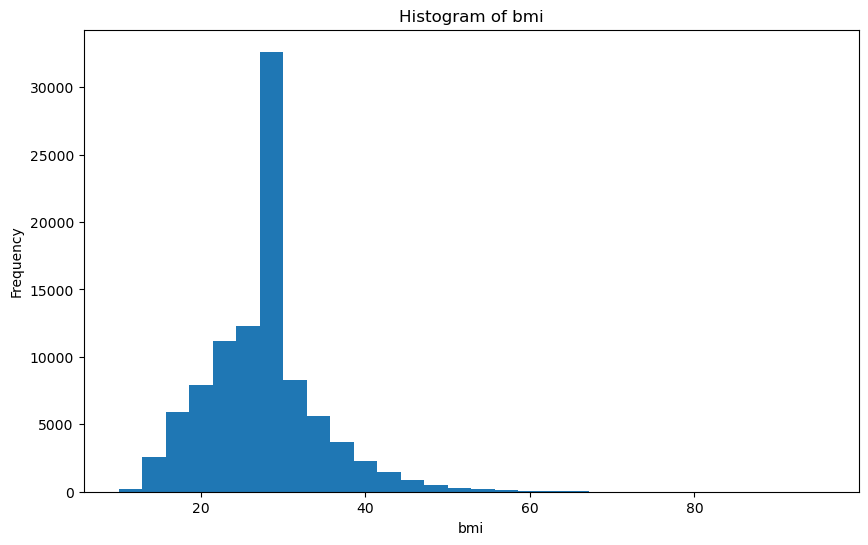

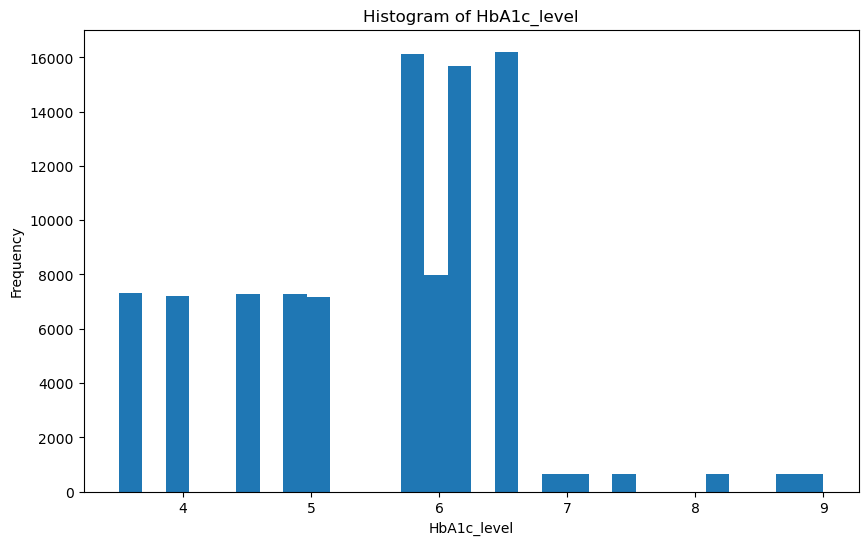

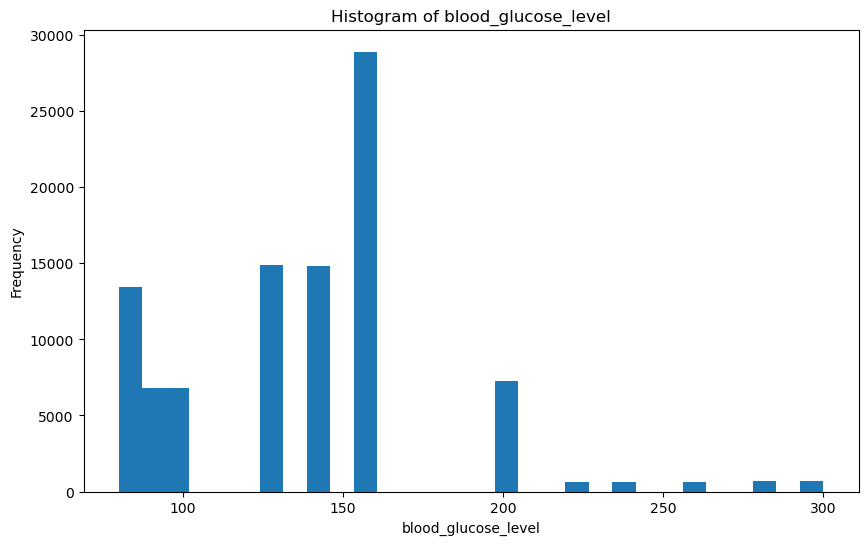

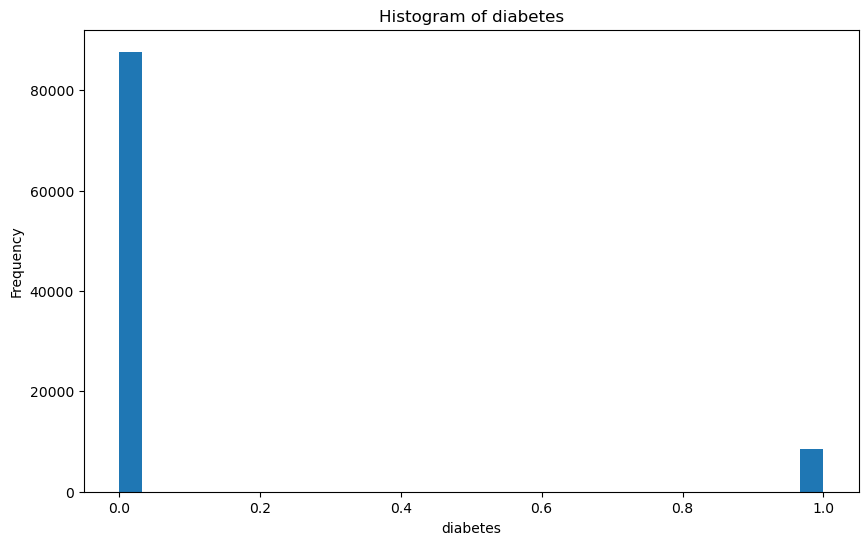

In [12]:
for column in df.columns:
    plt.figure(figsize=(10, 6))
    df[column].hist(bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

In [13]:
df["gender"] = df["gender"].apply(lambda x: 1 if x == "Male" else 0)
features_to_encode = ["smoking_history"]

In [16]:
y = df["diabetes"]

# Instantiate the encoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the data
encoded_data = encoder.fit_transform(df[features_to_encode])

# Create a DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(features_to_encode))

# Reset index of your original DataFrame if it's not in default sequential order
df.reset_index(drop=True, inplace=True)

# Concatenate the original DataFrame with the new encoded DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Optionally, drop the original columns
df.drop(features_to_encode, axis=1, inplace=True)

/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


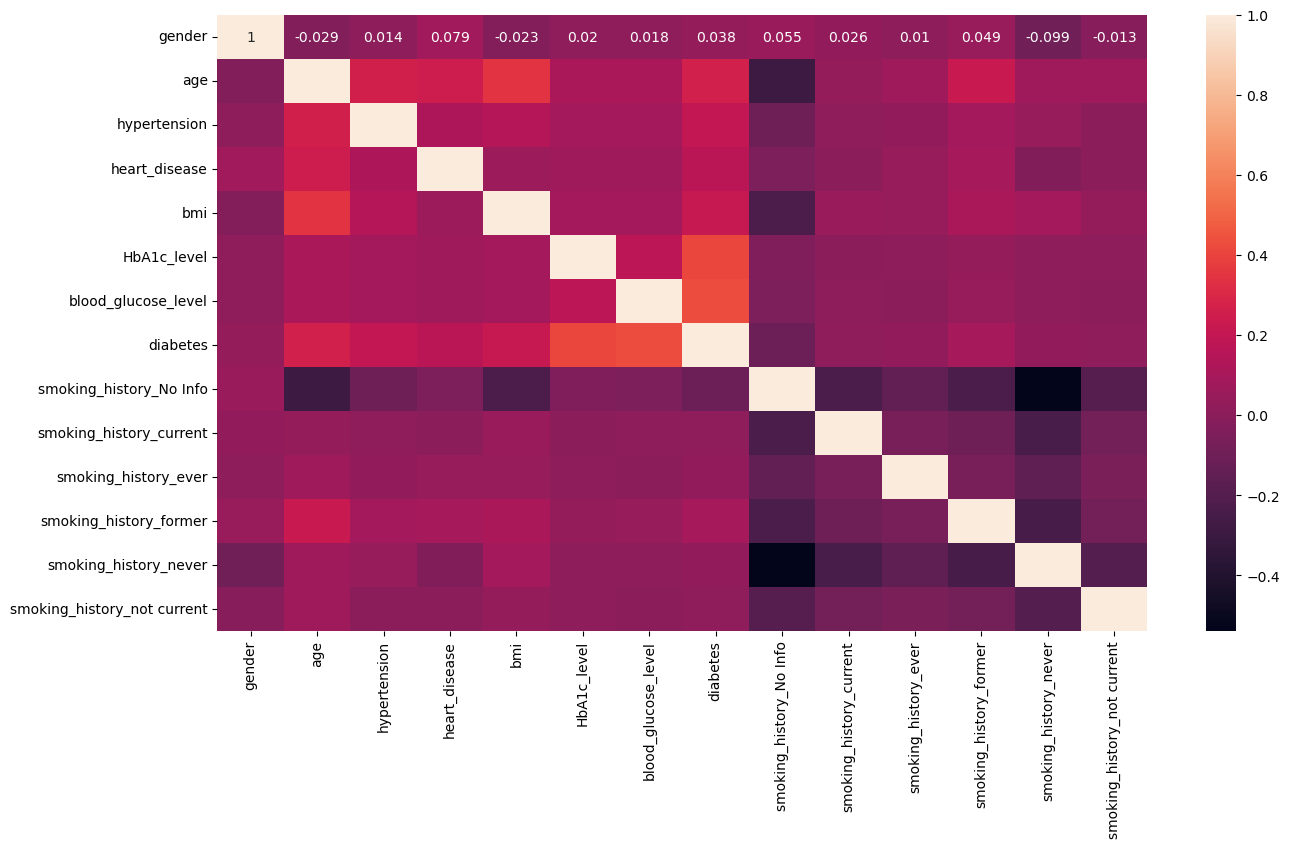

In [18]:
plt.figure(figsize=(15,8))
relations = df.corr()
sns.heatmap(data=relations,annot=True)
plt.show()

In [20]:
X, y = df.drop("diabetes", axis=1), df["diabetes"]
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

models = run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded)
models

LogisticRegression Accuracy: 0.9570982839313572
SVC Accuracy: 0.9602704108164326
DecisionTreeClassifier Accuracy: 0.9501820072802912
RandomForestClassifier Accuracy: 0.96801872074883
KNeighborsClassifier Accuracy: 0.9580863234529381
GradientBoostingClassifier Accuracy: 0.9709828393135725
GaussianNB Accuracy: 0.8976079043161727
Epoch 1/50
7692/7692 [==============================] - 6s 680us/step - loss: 0.1188 - accuracy: 0.9585
Epoch 2/50
7692/7692 [==============================] - 4s 475us/step - loss: 0.0958 - accuracy: 0.9665
Epoch 3/50
7692/7692 [==============================] - 4s 463us/step - loss: 0.0897 - accuracy: 0.9687
Epoch 4/50
7692/7692 [==============================] - 4s 507us/step - loss: 0.0879 - accuracy: 0.9693
Epoch 5/50
7692/7692 [==============================] - 4s 483us/step - loss: 0.0871 - accuracy: 0.9696
Epoch 6/50
7692/7692 [==============================] - 4s 473us/step - loss: 0.0865 - accuracy: 0.9699
Epoch 7/50
7692/7692 [=========================

,Model,Accuracy
0,LogisticRegression,0.957098
1,SVC,0.960270
2,DecisionTreeClassifier,0.950182
3,RandomForestClassifier,0.968019
4,KNeighborsClassifier,0.958086
5,GradientBoostingClassifier,0.970983
6,GaussianNB,0.897608
7,Sequential,0.969891
